# Sheet 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

## Exercise 1: Variance of beta

To compute the covariance of the components of 
the vector $\hat\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T Y$
we assume $Y = X^T \beta + \epsilon$ with $\epsilon \sim \mathcal{N}(0,\sigma^2)$, as 
specified on the sheet. This assumes that the whole randomness of $Y$
comes from $\epsilon$, given knowledge of $X$. Therefore

\begin{align}
\text{Var}_{Y|X}(\hat\beta) 
& = E_{Y|X} \left[(\hat\beta - E_{Y|X}(\hat\beta)) (\hat\beta - E_{Y|X}(\hat\beta))^T\right] \\
& = E_{Y|X} \left[ \big((\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T (X^T\beta + \epsilon) - (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T X^T\beta )\big) \big(...\big)^T \right] \\
& = E_{Y|X} \left[ (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \epsilon  \epsilon \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1}  \right] \\
& = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T E_{Y|X} \left[ \epsilon  \epsilon \right] \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \\
& = (\mathbf{X}^T \mathbf{X})^{-1} \sigma^2.
\end{align}

## Exercise 2: Ridge regression

In [12]:
pcancer = pd.read_csv("prostate.csv",delimiter=',')

pcancer.head(8)

N = pcancer.shape[0]

Analysis of prostate-specific antigen and clinical measures
among men who were about to have their prostates removed

Features (first eight columns of pcancer):
- lcavol : log(cancer volume)
- lweight : log(prostate weight)
- age : age
- lbph : log(benign prostatic hyperplasia)
- svi : seminal vesicle invasion
- lcp : log(capsular penetration)
- gleason : Gleason score
- pgg45 : percent of Gleason scores 4 or 5

Target: (lpsa, the ninth column)
- lpsa : log(prostate-specific antigen)

Use pcancer['train'] == True for training data and False as testing data

In [25]:
# There's a training sub-dataset that we will focus on. Later, we will try to predict
# the values of the remaining observations.
col_num = 8
Xtrain = pcancer.loc[pcancer['train'] == True,pcancer.columns[0:col_num]]
ytrain = pcancer.loc[pcancer['train'] == True,pcancer.columns[col_num]]
Xtrain.head(8)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0
10,0.254642,3.604138,65,-1.386294,0,-1.386294,6,0


Plot the density of each feature

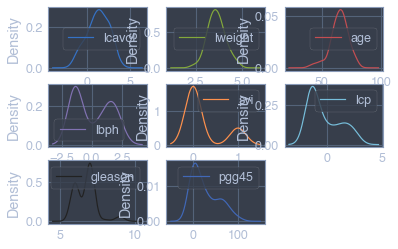

In [26]:
Xtrain.plot(kind='density',subplots=True,layout = (3,3),sharex=False)
plt.show()

[Text(0, 0, 'lcavol'),
 Text(0, 0, 'lweight'),
 Text(0, 0, 'age'),
 Text(0, 0, 'lbph'),
 Text(0, 0, 'svi'),
 Text(0, 0, 'lcp'),
 Text(0, 0, 'gleason'),
 Text(0, 0, 'pgg45')]

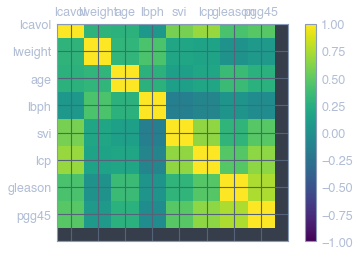

In [27]:
# We see that there are many strong correlations between features
# and lpsa. Therefore we need to fit the effects jointly to
# disentangle the relationships between the features and lpsa.

names = list(Xtrain)
correlations = Xtrain.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

In [28]:
# scale features to have zero mean and unit variance, but do not adjust target, lpsa
from sklearn import linear_model,preprocessing

mn = Xtrain.mean()
std = Xtrain.std()

Xtrain = (Xtrain-mn)/std

Xtest = pcancer.loc[pcancer['train'] == False,pcancer.columns[0:col_num]]
ytest = pcancer.loc[pcancer['train'] == False,pcancer.columns[col_num]]
Xtest.head(8)

Xtest = (Xtest-mn)/std

Fit a linear regression model and calculate the error for training and testing data

In [29]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(Xtrain,ytrain)
print('training error of linear regression:',(sum(ytrain-linear_reg.predict(Xtrain))**2)/N)
print('testing error of linear regression:',(sum(ytest-linear_reg.predict(Xtest))**2)/N)

training error of linear regression: 5.497628576591794e-30
testing error of linear regression: 0.017557867000730466


Fit ridge regression models with different regularization strength $\lambda$, plot fitted coefficients as a function of $\lambda$

In [33]:
from sklearn.linear_model import Ridge
n_alphas = 5000
lam = np.logspace(-10, 3, n_alphas)
model_ridge_coef = np.zeros((lam.shape[0],9))
sample_num = Xtrain.shape[0]
for i in range(lam.shape[0]):
    model_ridge = Ridge(alpha=lam[i])
    model_ridge.fit(Xtrain, ytrain)
    model_ridge_coef[i,0] = model_ridge.intercept_
    model_ridge_coef[i,1:] = model_ridge.coef_
    

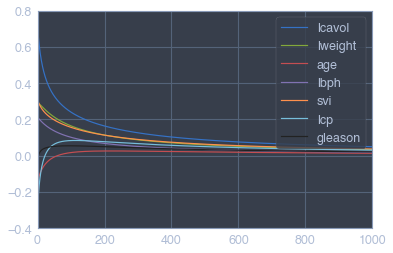

In [35]:
plt.figure()
plt.plot(lam,model_ridge_coef[:,1:-1])
plt.ylim(-0.4,0.8)
plt.xlim(min(lam),max(lam))
plt.legend(names[0:8])
plt.show()

Compute the degrees of freedom for each value of $\lambda$

In [52]:
D = np.concatenate((np.ones(Xtrain.shape[0]).reshape(-1,1),Xtrain),axis=1)
dfRes = np.zeros(lam.shape[0])
betaRes = np.zeros((lam.shape[0],col_num+1))
for i in range(lam.shape[0]):
    M = np.linalg.pinv(np.transpose(D).dot(D)+lam[i]*np.identity(col_num+1)).dot(np.transpose(D))
    betaHat = M.dot(ytrain)
    df = np.trace(D.dot(M))
    
    dfRes[i] = df
    betaRes[i,:] = betaHat

Plot the fitted coefficients as a function of the degrees of freedom

(9, 5000)


Text(0, 0.5, 'Beta')

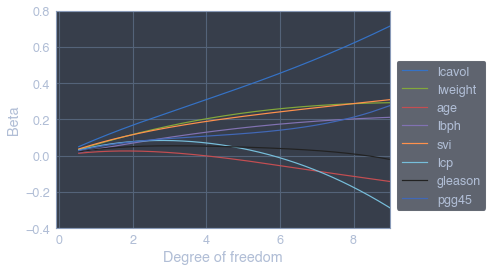

In [56]:
print(np.transpose(model_ridge_coef).shape)
plt.figure()
plt.plot(dfRes,betaRes[:,1:])
plt.ylim(-0.4,0.8)
plt.xlim(-0.1,9)
plt.legend(names[0:8],bbox_to_anchor=(+1, 0.8))
plt.xlabel('Degree of freedom')
plt.ylabel('Beta')

Note that we can also compute the fitted coefficients using $\hat\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T Y$, and check whether they are the same as the coefficients returned by the sklearn built-in function

(9, 5000)


Text(0, 0.5, 'Beta')

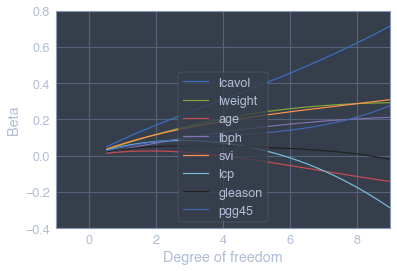

In [55]:
print(np.transpose(betaRes).shape)
plt.figure()
plt.plot(dfRes,model_ridge_coef[:,1:])
plt.ylim(-0.4,0.8)
plt.xlim(-1,9)
plt.legend(names[0:8])
plt.xlabel('Degree of freedom')
plt.ylabel('Beta')

Computer optimal regularization paper for ridge and compare the error for ridge model and oridinary linear regression model

In [57]:
from sklearn.linear_model import RidgeCV
optim_ridge = RidgeCV(lam).fit(Xtrain,ytrain)
print('optimal regression strength lambda is:', optim_ridge.alpha_)

optimal regression strength lambda is: 3.5934458285364057


In [59]:
print('training error of ridge regression:',np.linalg.norm(np.array(ytrain) - optim_ridge.predict(Xtrain)))
print('training error of linear regression:',np.linalg.norm(np.array(ytrain)-linear_reg.predict(Xtrain)))
print('testing error of ridge regression:',np.linalg.norm(np.array(ytest) - optim_ridge.predict(Xtest)))
print('testing error of linear regression:',np.linalg.norm(np.array(ytest)-linear_reg.predict(Xtest)))

training error of ridge regression: 5.455799774279666
training error of linear regression: 5.424609152732425
testing error of ridge regression: 3.8663776101989065
testing error of linear regression: 3.954518954971388
